<a href="https://colab.research.google.com/github/imamsohel/Decision-Tree-Practice/blob/main/Assignment_on_LR_vs_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv('/content/weight-height.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [3]:
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


Target weight and Training gender and height

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [7]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

Gender is in object format. we have to change it into numerical format using LabelEncoder.

In [8]:
df.isnull().head()

,Gender,Height,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


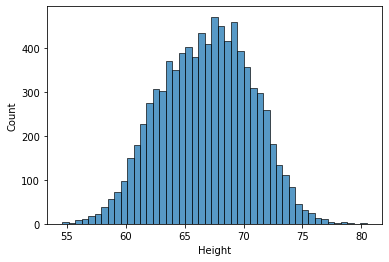

In [9]:
import seaborn as sns
sns.histplot(df['Height'])


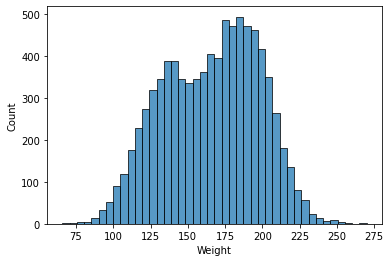

In [10]:
sns.histplot(df['Weight'])

In [11]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df.Gender = df.Gender.replace(['Male', 'Female'] , [1,0])
df.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int64

In [13]:
df.sample(10)

,Gender,Height,Weight
1588,1,72.367492,218.394555
4301,1,63.090290,140.517044
6007,0,62.321197,132.118590
7585,0,67.069908,163.451651
5565,0,62.616461,114.988392
4008,1,73.972278,201.205102
2336,1,71.091332,198.030958
1998,1,69.667115,192.558899
2304,1,63.472414,141.096825
5964,0,66.540015,159.992035


In [14]:
inputs = df.drop('Weight', axis=1)
target = df['Weight']

In [15]:
inputs.sample(5)

,Gender,Height
952,1,66.001968
4617,1,68.797879
4067,1,73.298339
1316,1,69.044211
7701,0,65.849283


In [16]:
target.sample(5)

6076    116.971457
1570    152.949488
1799    205.618956
7925    119.681095
4189    163.836439
Name: Weight, dtype: float64

In [17]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [110]:
inputs = df.drop('Weight', axis=1)
target = df['Weight']
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1 = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs) # predictions based on input dat

predictions
model_1.score(inputs, target)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Gender
Feature names seen at fit time, yet now missing:
- Weight

  warnings.warn(message, FutureWarning)


0.8999617788124956

In [113]:
lr_model_score=model_1.score(inputs, target)
lr_model_score

0.8999617788124956

In [20]:
model.coef_

array([19.5062689 ,  5.97547256])

In [21]:
model.intercept_

-244.98864716917748

In [22]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [23]:
loss = rmse(target, predictions)
loss

10.134521894985296

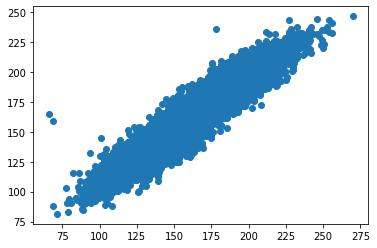

In [24]:
graph=plt.scatter(target,predictions)

In [25]:
df1=df.copy()
df1
df2=df.copy()
df3=df.copy()

In [26]:
df1

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


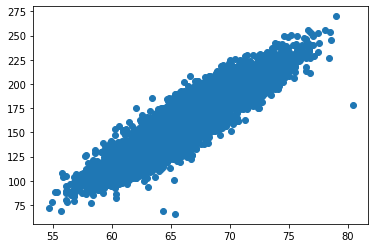

In [27]:
plt.scatter(df1.Height,df1.Weight) # EDA shows that they are linearly increased.

In [28]:
X=df1.drop('Weight',axis=1) #inputs
y=df1['Weight'] # targets

In [29]:
X

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [30]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # X, y is our input data which we are splitted.

In [32]:
len(X_train)

5988

In [33]:
X_train # due to random state my data is not changing when i have run several times.

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308
...,...,...
5734,0,63.349988
5191,0,58.861625
5390,0,64.325406
860,1,69.074492


In [34]:
len(X_test)

2567

In [35]:
y_train

553     186.751417
1397    211.031652
7934    143.768451
8367    151.814648
3320    196.505814
           ...    
5734    139.223151
5191     90.728561
5390    156.800504
860     179.386817
7270    150.380597
Name: Weight, Length: 5988, dtype: float64

In [36]:
y_test

6006    149.668369
1197    197.642244
2862    178.551191
6497    141.343095
2860    195.322675
           ...    
184     202.046425
2988    165.955953
6048     98.869253
420     190.933401
5669    123.868429
Name: Weight, Length: 2567, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train) # training the data and fit into the model
predictions = model.predict(X_test) # predictions based on input data

predictions


array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [38]:
y_test

6006    149.668369
1197    197.642244
2862    178.551191
6497    141.343095
2860    195.322675
           ...    
184     202.046425
2988    165.955953
6048     98.869253
420     190.933401
5669    123.868429
Name: Weight, Length: 2567, dtype: float64

In [39]:
model.score(X_test,y_test) # evaluation of the model

0.905911242442266

In [40]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [41]:
corr=df2.corr()
corr

,Gender,Height,Weight
Gender,1.000000,0.682524,0.790208
Height,0.682524,1.000000,0.922975
Weight,0.790208,0.922975,1.000000


# KNN Regressor
###
1. Import data set
2. Seperate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate Model (Accuracy, MSE, MAE)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate Model (Accuracy, MSE, Prediction)


In [42]:
X_train.head()

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308


In [43]:
len(X_train)

5988

In [116]:
#For train test split method, we will separate x train(input variable) and y train(target variable), xtest adn y test
# X=df2.drop('Weight', axis=1)
# X = df2[['Gender','Height']].values.reshape(-1,1)
# y=df2['Weight'].values.reshape(-1,1)
X=df2.drop('Weight', axis=1)
y=df2['Weight']

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=100)


In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state = 42)

In [119]:
model = knn_model.fit(X_train, y_train) # training the data and fit into the model



In [120]:
predictions=model.predict(X_test)
predictions

array([142.71846277, 185.09590868, 196.963273  , ..., 103.84821427,
       191.77975045, 143.65918106])

In [121]:
model.score(X_test, y_test) # X_test=predicted y and y_test=actual y

0.903816678517811

In [122]:
predictions=model.predict(X_test)
predictions

array([142.71846277, 185.09590868, 196.963273  , ..., 103.84821427,
       191.77975045, 143.65918106])

In [123]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions )  #X_test=predicted y and y_test=actual y
mse 

98.99309617416073

In [124]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test, predictions )  #X_test=predicted y and y_test=actual y
mae 

7.948568340949086

In [125]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score = r2_score(y_test, predictions )  #X_test=predicted y and y_test=actual y
r2_score

0.903816678517811

# KNN Classifier:
1. Import data set
2. Seperate x and y (y=Gender)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [54]:
df_1=pd.read_csv('/content/weight-height.csv')
df_1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [55]:
df_1.Gender.value_counts() # .value_counts function shows that number of male is 5000 and female is 3555.

Male      5000
Female    3555
Name: Gender, dtype: int64

In [56]:
df_1.Gender=df_1.Gender.replace(['Male','Female'], [1,0])
df_1.sample(5)

,Gender,Height,Weight
8264,0,59.223044,131.159090
1122,1,70.856950,197.727299
3460,1,67.414861,164.867862
151,1,65.350411,65.780000
6587,0,63.787898,128.204119


In [57]:
inputs = df_1[['Height','Weight']]
targets=df_1['Gender']

In [58]:
inputs.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [59]:
targets

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42) 
# X=inputs, y=targets is our input data which we are splitted.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X_train, y_train)

In [62]:
predicted_y=model.predict(X_test)
predicted_y

array([0, 1, 1, ..., 0, 1, 0])

In [63]:
print(predicted_y)

[0 1 1 ... 0 1 0]


In [66]:
predicted_y.shape

(2567,)

In [64]:
actual_y=y_test
actual_y

6006    0
1197    1
2862    1
6497    0
2860    1
       ..
184     1
2988    1
6048    0
420     1
5669    0
Name: Gender, Length: 2567, dtype: int64

In [67]:
actual_y.shape

(2567,)

In [73]:
predicted_y=predicted_y.reshape(-1,1)


In [74]:
predicted_y.shape

(2567, 1)

In [76]:
predicted_y.ndim

2

In [72]:
actual_y.reshape(-1,1)

AttributeError: ignored

In [65]:
model.score(predicted_y, actual_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [77]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae_KNN = mean_absolute_error(actual_y, predicted_y )  
mae_KNN 

0.09855862874951304

In [78]:
mse_knn = mean_squared_error(actual_y, predicted_y )  
mse_knn 

0.09855862874951304

In [79]:
r2_score_knn = r2_score(actual_y, predicted_y)
r2_score_knn

0.5941098679679463

In [98]:
# Classification Problem
# Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

In [80]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [81]:
classification_report(actual_y, predicted_y) 

'              precision    recall  f1-score   support\n\n           0       0.88      0.88      0.88      1066\n           1       0.91      0.92      0.92      1501\n\n    accuracy                           0.90      2567\n   macro avg       0.90      0.90      0.90      2567\nweighted avg       0.90      0.90      0.90      2567\n'

In [82]:
print(classification_report(actual_y, predicted_y)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1066
           1       0.91      0.92      0.92      1501

    accuracy                           0.90      2567
   macro avg       0.90      0.90      0.90      2567
weighted avg       0.90      0.90      0.90      2567



In [83]:
confusion_matrix(actual_y, predicted_y)

array([[ 935,  131],
       [ 122, 1379]])

In [84]:
accuracy_score(actual_y, predicted_y)

0.901441371250487

In [85]:
(935+1379) / (131+122+935+1379) 

0.901441371250487

In [86]:
tp, fn, fp, tn = confusion_matrix(actual_y, predicted_y).reshape(-1) 

In [87]:
tp

935

In [88]:
fn

131

In [89]:
fp

122

In [90]:
tn

1379

In [92]:
# Accuracy
acc = (tp+tn) / (tp+tn+fp+fn)
acc

0.901441371250487

In [93]:
# Precison or positive predictive value
precision = tp / (tp+fp)
precision

0.8845789971617786

In [94]:
# sensivity or recall
sensivity = tp / (tp+fn)
sensivity

0.8771106941838649

In [95]:
#f1 score 
F1=(precision+sensivity)/2
F1

0.8808448456728217

In [96]:
# F1 score or harmonic mean
F1_score=(2*precision*sensivity)/precision+sensivity
F1_score

2.6313320825515945

In [100]:
# import numpy as np
# np.array(actual_y)

array([0, 1, 1, ..., 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


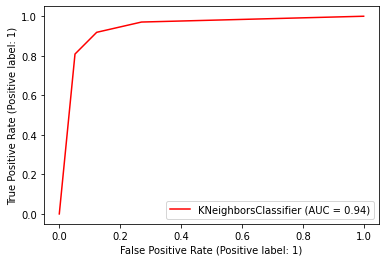

In [107]:
plot_roc_curve(model, X_test, y_test, color='red')

In [126]:
print('For Regression:\n')
print('Linear Regression Score:', lr_model_score)
print('KNN Regression Score:', r2_score)

print('For Classification:\n')
print('KNN Classification Score:', acc)


For Regression:

Linear Regression Score: 0.8999617788124956
KNN Regression Score: 0.903816678517811
For Classification:

KNN Classification Score: 0.901441371250487
